In [1]:
#-----------------------------------
# GLOBAL FEATURE EXTRACTION
#-----------------------------------

# organize imports
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import mahotas
import cv2
import os
import h5py

# fixed-sizes for image
fixed_size = tuple((256, 256))

# path to training data
train_path = "dataset/train/"

# no.of.trees for Random Forests
num_trees = 100

# bins for histogram
bins = 8

# train_test_split size
test_size = 0.10

# seed for reproducing same results
seed = 9

# feature-descriptor-1: Hu Moments
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

# feature-descriptor-2: Haralick Texture
def fd_haralick(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    # return the result
    return haralick

# feature-descriptor-3: Color Histogram
def fd_histogram(image, mask=None):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    # return the histogram
    return hist.flatten()

# get the training labels
train_labels = os.listdir(train_path)

# sort the training labels
train_labels.sort()
print(train_labels)

# empty lists to hold feature vectors and labels
global_features = []
labels = []

i, j = 0, 0
k = 0

# num of images per class
images_per_class = 80

# loop over the training data sub-folders
for training_name in train_labels:
    # join the training data path and each species training folder
    dir = os.path.join(train_path, training_name)

    # get the current training label
    current_label = training_name

    k = 1
    # loop over the images in each sub-folder
    name='image_'
    for x in range(1,images_per_class+1):
        # get the image file name
        # file = dir + "/" + str(x) + ".jpg"
        file = dir + "/" + name + str(x) + ".jpg"
        print(file)

        # read the image and resize it to a fixed-size
        image = cv2.imread(file)
        image = cv2.resize(image, fixed_size)

        ####################################
        # Global Feature extraction
        ####################################
        fv_hu_moments = fd_hu_moments(image)
        fv_haralick   = fd_haralick(image)
        fv_histogram  = fd_histogram(image)

        ###################################
        # Concatenate global features
        ###################################
        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

        # update the list of labels and feature vectors
        labels.append(current_label)
        global_features.append(global_feature)

        i += 1
        k += 1
    print("[STATUS] processed folder: {}".format(current_label))
    j += 1

print("[STATUS] completed Global Feature Extraction...")
# get the overall feature vector size
print("[STATUS] feature vector size {}".format(np.array(global_features).shape))

# get the overall training label size
print("[STATUS] training Labels {}".format(np.array(labels).shape))

# encode the target labels
targetNames = np.unique(labels)
le = LabelEncoder()
target = le.fit_transform(labels)
print("[STATUS] training labels encoded...")

# normalize the feature vector in the range (0-1)
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)
print("[STATUS] feature vector normalized...")

print("[STATUS] target labels: {}".format(target))
print("[STATUS] target labels shape: {}".format(target.shape))

# save the feature vector using HDF5
h5f_data = h5py.File('output/data.h5', 'w')
h5f_data.create_dataset('dataset_1', data=np.array(rescaled_features))

h5f_label = h5py.File('output/labels.h5', 'w')
h5f_label.create_dataset('dataset_1', data=np.array(target))

h5f_data.close()
h5f_label.close()

print("[STATUS] end of training..")

C:\Users\Aayush\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


['bluebell', 'buttercup', 'coltsfoot', 'cowslip', 'crocus', 'daffodil', 'daisy', 'dandelion', 'fritillary', 'iris', 'lilyvalley', 'pansy', 'snowdrop', 'sunflower', 'tigerlily', 'tulip', 'windflower']
dataset/train/bluebell/image_1.jpg
dataset/train/bluebell/image_2.jpg
dataset/train/bluebell/image_3.jpg
dataset/train/bluebell/image_4.jpg
dataset/train/bluebell/image_5.jpg
dataset/train/bluebell/image_6.jpg
dataset/train/bluebell/image_7.jpg
dataset/train/bluebell/image_8.jpg
dataset/train/bluebell/image_9.jpg
dataset/train/bluebell/image_10.jpg
dataset/train/bluebell/image_11.jpg
dataset/train/bluebell/image_12.jpg
dataset/train/bluebell/image_13.jpg
dataset/train/bluebell/image_14.jpg
dataset/train/bluebell/image_15.jpg
dataset/train/bluebell/image_16.jpg
dataset/train/bluebell/image_17.jpg
dataset/train/bluebell/image_18.jpg
dataset/train/bluebell/image_19.jpg
dataset/train/bluebell/image_20.jpg
dataset/train/bluebell/image_21.jpg
dataset/train/bluebell/image_22.jpg
dataset/train/blu

dataset/train/coltsfoot/image_63.jpg
dataset/train/coltsfoot/image_64.jpg
dataset/train/coltsfoot/image_65.jpg
dataset/train/coltsfoot/image_66.jpg
dataset/train/coltsfoot/image_67.jpg
dataset/train/coltsfoot/image_68.jpg
dataset/train/coltsfoot/image_69.jpg
dataset/train/coltsfoot/image_70.jpg
dataset/train/coltsfoot/image_71.jpg
dataset/train/coltsfoot/image_72.jpg
dataset/train/coltsfoot/image_73.jpg
dataset/train/coltsfoot/image_74.jpg
dataset/train/coltsfoot/image_75.jpg
dataset/train/coltsfoot/image_76.jpg
dataset/train/coltsfoot/image_77.jpg
dataset/train/coltsfoot/image_78.jpg
dataset/train/coltsfoot/image_79.jpg
dataset/train/coltsfoot/image_80.jpg
[STATUS] processed folder: coltsfoot
dataset/train/cowslip/image_1.jpg
dataset/train/cowslip/image_2.jpg
dataset/train/cowslip/image_3.jpg
dataset/train/cowslip/image_4.jpg
dataset/train/cowslip/image_5.jpg
dataset/train/cowslip/image_6.jpg
dataset/train/cowslip/image_7.jpg
dataset/train/cowslip/image_8.jpg
dataset/train/cowslip/ima

dataset/train/daffodil/image_56.jpg
dataset/train/daffodil/image_57.jpg
dataset/train/daffodil/image_58.jpg
dataset/train/daffodil/image_59.jpg
dataset/train/daffodil/image_60.jpg
dataset/train/daffodil/image_61.jpg
dataset/train/daffodil/image_62.jpg
dataset/train/daffodil/image_63.jpg
dataset/train/daffodil/image_64.jpg
dataset/train/daffodil/image_65.jpg
dataset/train/daffodil/image_66.jpg
dataset/train/daffodil/image_67.jpg
dataset/train/daffodil/image_68.jpg
dataset/train/daffodil/image_69.jpg
dataset/train/daffodil/image_70.jpg
dataset/train/daffodil/image_71.jpg
dataset/train/daffodil/image_72.jpg
dataset/train/daffodil/image_73.jpg
dataset/train/daffodil/image_74.jpg
dataset/train/daffodil/image_75.jpg
dataset/train/daffodil/image_76.jpg
dataset/train/daffodil/image_77.jpg
dataset/train/daffodil/image_78.jpg
dataset/train/daffodil/image_79.jpg
dataset/train/daffodil/image_80.jpg
[STATUS] processed folder: daffodil
dataset/train/daisy/image_1.jpg
dataset/train/daisy/image_2.jpg


dataset/train/fritillary/image_46.jpg
dataset/train/fritillary/image_47.jpg
dataset/train/fritillary/image_48.jpg
dataset/train/fritillary/image_49.jpg
dataset/train/fritillary/image_50.jpg
dataset/train/fritillary/image_51.jpg
dataset/train/fritillary/image_52.jpg
dataset/train/fritillary/image_53.jpg
dataset/train/fritillary/image_54.jpg
dataset/train/fritillary/image_55.jpg
dataset/train/fritillary/image_56.jpg
dataset/train/fritillary/image_57.jpg
dataset/train/fritillary/image_58.jpg
dataset/train/fritillary/image_59.jpg
dataset/train/fritillary/image_60.jpg
dataset/train/fritillary/image_61.jpg
dataset/train/fritillary/image_62.jpg
dataset/train/fritillary/image_63.jpg
dataset/train/fritillary/image_64.jpg
dataset/train/fritillary/image_65.jpg
dataset/train/fritillary/image_66.jpg
dataset/train/fritillary/image_67.jpg
dataset/train/fritillary/image_68.jpg
dataset/train/fritillary/image_69.jpg
dataset/train/fritillary/image_70.jpg
dataset/train/fritillary/image_71.jpg
dataset/trai

dataset/train/pansy/image_37.jpg
dataset/train/pansy/image_38.jpg
dataset/train/pansy/image_39.jpg
dataset/train/pansy/image_40.jpg
dataset/train/pansy/image_41.jpg
dataset/train/pansy/image_42.jpg
dataset/train/pansy/image_43.jpg
dataset/train/pansy/image_44.jpg
dataset/train/pansy/image_45.jpg
dataset/train/pansy/image_46.jpg
dataset/train/pansy/image_47.jpg
dataset/train/pansy/image_48.jpg
dataset/train/pansy/image_49.jpg
dataset/train/pansy/image_50.jpg
dataset/train/pansy/image_51.jpg
dataset/train/pansy/image_52.jpg
dataset/train/pansy/image_53.jpg
dataset/train/pansy/image_54.jpg
dataset/train/pansy/image_55.jpg
dataset/train/pansy/image_56.jpg
dataset/train/pansy/image_57.jpg
dataset/train/pansy/image_58.jpg
dataset/train/pansy/image_59.jpg
dataset/train/pansy/image_60.jpg
dataset/train/pansy/image_61.jpg
dataset/train/pansy/image_62.jpg
dataset/train/pansy/image_63.jpg
dataset/train/pansy/image_64.jpg
dataset/train/pansy/image_65.jpg
dataset/train/pansy/image_66.jpg
dataset/tr

dataset/train/tigerlily/image_26.jpg
dataset/train/tigerlily/image_27.jpg
dataset/train/tigerlily/image_28.jpg
dataset/train/tigerlily/image_29.jpg
dataset/train/tigerlily/image_30.jpg
dataset/train/tigerlily/image_31.jpg
dataset/train/tigerlily/image_32.jpg
dataset/train/tigerlily/image_33.jpg
dataset/train/tigerlily/image_34.jpg
dataset/train/tigerlily/image_35.jpg
dataset/train/tigerlily/image_36.jpg
dataset/train/tigerlily/image_37.jpg
dataset/train/tigerlily/image_38.jpg
dataset/train/tigerlily/image_39.jpg
dataset/train/tigerlily/image_40.jpg
dataset/train/tigerlily/image_41.jpg
dataset/train/tigerlily/image_42.jpg
dataset/train/tigerlily/image_43.jpg
dataset/train/tigerlily/image_44.jpg
dataset/train/tigerlily/image_45.jpg
dataset/train/tigerlily/image_46.jpg
dataset/train/tigerlily/image_47.jpg
dataset/train/tigerlily/image_48.jpg
dataset/train/tigerlily/image_49.jpg
dataset/train/tigerlily/image_50.jpg
dataset/train/tigerlily/image_51.jpg
dataset/train/tigerlily/image_52.jpg
d

[STATUS] features shape: (1360, 532)
[STATUS] labels shape: (1360,)
[STATUS] training started...
[STATUS] splitted train and test data...
Train data  : (1224, 532)
Test data   : (136, 532)
Train labels: (1224,)
Test labels : (136,)
LR: 0.516400 (0.052276)
LDA: 0.440357 (0.047299)
KNN: 0.366034 (0.045853)
CART: 0.449374 (0.033860)
RF: 0.654392 (0.049764)
NB: 0.377509 (0.045382)
SVM: 0.048267 (0.034914)


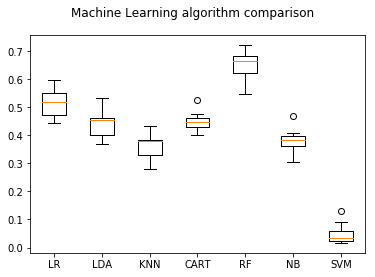

0


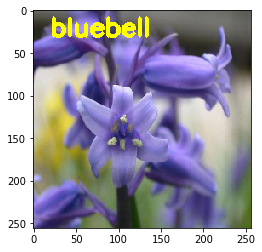

13


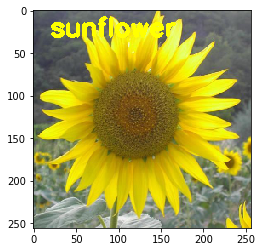

2


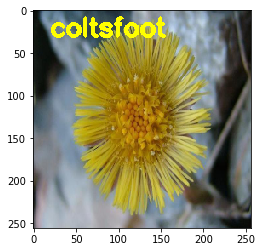

1


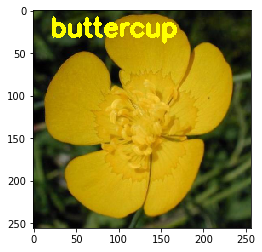

3


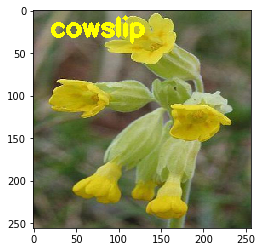

8


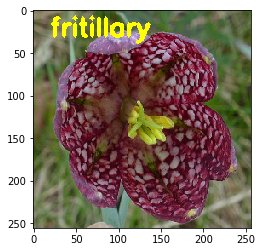

6


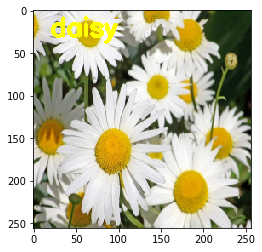

13


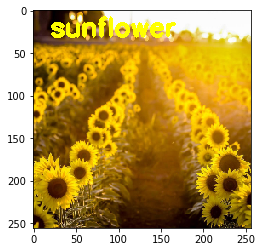

In [11]:
# -*- coding: utf-8 -*-
#-----------------------------------
# TRAINING OUR MODEL
#-----------------------------------

# import the necessary packages
import h5py
import numpy as np
import os
import glob
import cv2
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib
from globalfeature import fd_hu_moments
from globalfeature import fd_haralick
from globalfeature import fd_histogram

# fixed-sizes for image
fixed_size = tuple((256, 256))
# no.of.trees for Random Forests
num_trees = 100
# train_test_split size
test_size = 0.10
# seed for reproducing same results
seed = 9

# create all the machine learning models
models = []
models.append(('LR', LogisticRegression(random_state=9)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=9)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=9)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=9)))



# variables to hold the results and names
results = []
names = []
scoring = "accuracy"

# import the feature vector and trained labels
h5f_data = h5py.File('output/data.h5', 'r')
h5f_label = h5py.File('output/labels.h5', 'r')

global_features_string = h5f_data['dataset_1']
global_labels_string = h5f_label['dataset_1']

global_features = np.array(global_features_string)
global_labels = np.array(global_labels_string)

h5f_data.close()
h5f_label.close()

# verify the shape of the feature vector and labels
print("[STATUS] features shape: {}".format(global_features.shape))
print("[STATUS] labels shape: {}".format(global_labels.shape))

print("[STATUS] training started...")

# split the training and testing data
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)

print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape))
print("Train labels: {}".format(trainLabelsGlobal.shape))
print("Test labels : {}".format(testLabelsGlobal.shape))

# filter all the warnings
import warnings
warnings.filterwarnings('ignore')

# 10-fold cross validation
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

#-----------------------------------
# TESTING OUR MODEL
#-----------------------------------

# to visualize results
import matplotlib.pyplot as plt

# create the model - Random Forests
clf  = RandomForestClassifier(n_estimators=100, random_state=9)

# fit the training data to the model
clf.fit(trainDataGlobal, trainLabelsGlobal)

# path to test data
test_path = "dataset/test"

# file_write_obj = open("result1.txt", 'w')

# loop through the test images
for file in glob.glob(test_path + "/*.jpg"):
    # read the image
    image = cv2.imread(file)    
    # print(file)

    # resize the image
    image = cv2.resize(image, fixed_size)

    ####################################
    # Global Feature extraction
    ####################################
    fv_hu_moments = fd_hu_moments(image)
    fv_haralick   = fd_haralick(image)
    fv_histogram  = fd_histogram(image)

    ###################################
    # Concatenate global features
    ###################################
    global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

    # predict label of test image
    prediction = clf.predict(global_feature.reshape(1,-1))[0]
    print(prediction)
    
    # mylist=[str(file),str(prediction)]
    # for var in mylist:
    #    file_write_obj.writelines(var)
    #    file_write_obj.write('\n')

    # show predicted label on image
    cv2.putText(image, train_labels[prediction], (20,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,255), 3)

    # display the output image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    
# file_write_obj.close()

